In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt

In [24]:
#assets to be included
tickers = ['AMD','ARKK','BA', 'CLII', 'DAL','DKNG','DMYD','FLR','GM','GS','IBM','INTC',
           'KO','MSFT','NIO','QS','UAL','VDIGX','WBA','XLE','XOM']

In [25]:
wgts = [0.050,
0.028,
0.078,
0.004,
0.019,
0.012,
0.004,
0.004,
0.009,
0.055,
0.167,
0.011,
0.014,
0.046,
0.021,
0.034,
0.008,
0.136,
0.014,
0.128,
0.162]

In [52]:
%time
price_data = yf.download(tickers, start = '2016-01-01')
spy_data = yf.download('SPY', start = '2016-01-01')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
[*********************100%***********************]  21 of 21 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
type(price_data)

pandas.core.frame.DataFrame

In [55]:
prices = price_data['Adj Close']
spy_price = spy_data['Adj Close']

In [56]:
spy_price

Date
2016-01-04    182.513626
2016-01-05    182.822327
2016-01-06    180.516174
2016-01-07    176.185333
2016-01-08    174.251419
                 ...    
2021-02-01    376.230011
2021-02-02    381.549988
2021-02-03    381.850006
2021-02-04    386.190002
2021-02-05    387.709991
Name: Adj Close, Length: 1283, dtype: float64

In [33]:
prices.head()

,AMD,ARKK,BA,CLII,DAL,DKNG,DMYD,FLR,GM,GS,...,INTC,KO,MSFT,NIO,QS,UAL,VDIGX,WBA,XLE,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,2.77,18.768906,126.005096,NaN,44.223190,NaN,NaN,43.507214,27.775911,162.570526,...,29.535355,35.990910,50.006744,NaN,NaN,55.610001,20.133709,72.487892,48.528412,61.158344
2016-01-05,2.75,18.918982,126.516296,NaN,44.141399,NaN,NaN,42.659134,27.042109,159.771362,...,29.396330,36.118237,50.234879,NaN,NaN,55.060001,20.224812,70.585129,48.713524,61.679451
2016-01-06,2.51,18.600067,124.507393,NaN,44.468582,NaN,NaN,41.491898,26.074837,155.870911,...,28.744617,35.923012,49.322346,NaN,NaN,55.200001,19.933281,69.502846,46.838375,61.166237
2016-01-07,2.28,17.868446,119.287804,NaN,42.714558,NaN,NaN,40.561745,25.007492,151.080276,...,27.667130,35.328827,47.606789,NaN,NaN,52.630001,19.550650,70.846992,45.695580,60.187199
2016-01-08,2.14,17.662094,116.579391,NaN,42.360115,NaN,NaN,39.513050,24.623917,150.456223,...,27.380383,35.235439,47.752792,NaN,NaN,51.889999,19.350225,70.742249,45.108093,58.971302


In [57]:
ret_data = prices.pct_change()[1:]
spy_ret = spy_price.pct_change()[1:]

In [36]:
wret = (wgts*ret_data)
wret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1282 entries, 2016-01-05 to 2021-02-05
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMD     1282 non-null   float64
 1   ARKK    1282 non-null   float64
 2   BA      1282 non-null   float64
 3   CLII    50 non-null     float64
 4   DAL     1282 non-null   float64
 5   DKNG    387 non-null    float64
 6   DMYD    85 non-null     float64
 7   FLR     1282 non-null   float64
 8   GM      1282 non-null   float64
 9   GS      1282 non-null   float64
 10  IBM     1282 non-null   float64
 11  INTC    1282 non-null   float64
 12  KO      1282 non-null   float64
 13  MSFT    1282 non-null   float64
 14  NIO     604 non-null    float64
 15  QS      119 non-null    float64
 16  UAL     1282 non-null   float64
 17  VDIGX   1282 non-null   float64
 18  WBA     1282 non-null   float64
 19  XLE     1282 non-null   float64
 20  XOM     1282 non-null   float64
dtypes: float64(21)
memo

In [37]:
wret.head()

,AMD,ARKK,BA,CLII,DAL,DKNG,DMYD,FLR,GM,GS,...,INTC,KO,MSFT,NIO,QS,UAL,VDIGX,WBA,XLE,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.000361,0.000224,0.000316,NaN,-0.000035,NaN,NaN,-0.000078,-0.000238,-0.000947,...,-0.000052,0.000050,0.000210,NaN,NaN,-0.000079,0.000615,-0.000367,0.000488,0.001380
2016-01-06,-0.004364,-0.000472,-0.001239,NaN,0.000141,NaN,NaN,-0.000109,-0.000322,-0.001343,...,-0.000244,-0.000076,-0.000836,NaN,NaN,0.000020,-0.001960,-0.000215,-0.004927,-0.001348
2016-01-07,-0.004582,-0.001101,-0.003270,NaN,-0.000749,NaN,NaN,-0.000090,-0.000368,-0.001690,...,-0.000412,-0.000232,-0.001600,NaN,NaN,-0.000372,-0.002611,0.000271,-0.003123,-0.002593
2016-01-08,-0.003070,-0.000323,-0.001771,NaN,-0.000158,NaN,NaN,-0.000103,-0.000138,-0.000227,...,-0.000114,-0.000037,0.000141,NaN,NaN,-0.000112,-0.001394,-0.000021,-0.001646,-0.003273
2016-01-11,0.004673,-0.000981,0.000132,NaN,0.000053,NaN,NaN,-0.000138,0.000219,0.000601,...,0.000192,0.000024,-0.000026,NaN,NaN,-0.000042,0.000192,-0.000005,-0.002740,-0.002169


In [39]:
port_ret = wret.sum(axis=1)
spy_1 = 

In [40]:
cum_ret = (port_ret +1).cumprod()

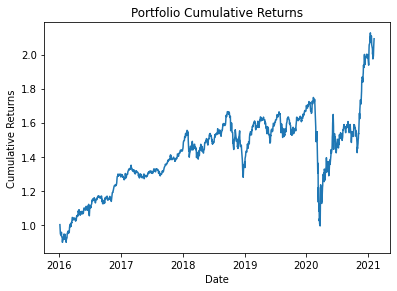

In [41]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(cum_ret, spy_ret)
ax1.set_xlabel('Date')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("Portfolio Cumulative Returns")
plt.show();